# Runtime comparison of alignment/quantification methods

This notebook reviews how we ran other tools and obtained Figure 3 in our paper. Before clustering cells, we need to obtain a feature vector for each cell. Each cell should have a unique feature vector, and similar cells (or cells of the same type) should have similar feature vectors. Various methods have been used to obtain this feature vector. We looked at two types of feature vectors: 

* gene/transcript abundances 
* TCCs of equivalence classes

Traditionally, cells have been represented using the abundances of different genes or transcripts. Tools such as eXpress quantify on aligned reads, a costly procedure done using tools such as Bowtie1 and HISAT. Therefore the runtimes of any procedure that quantifies on aligned reads are lower bounded by the alignment step. We look at the runtime of Bowtie and HISAT here.

We also look at the runtime of kallisto, which consists of pseudoaligning the reads followed by quantification of transcript abundances. Because TCCs does not require the second step, a pipeline that only requires pseudoalignment is even faster. 

Finally we look at how long the bash command "wc -l" takes to run on the input file. This is what we assume to be the fastest possible time to go through all reads in the file once.

In [10]:
# Modules used in this notebook 
import numpy as np
import os
import colorsys
import matplotlib.pyplot as plt

The inputs to this pipeline are 

* path to modified kallisto

* path to reference mouse transcriptoime

* paths to the chromosomes of mouse genome (to be put without spaces in ./hisat_chr_path_list.txt)

In [18]:
modified_kallisto_path='/data/SS_RNA_seq/Code/kalliPso'
mouse_reference='/data/SS_RNA_seq/Zeisel/reference_transcriptome/Mus_musculus.GRCm38.rel79.cdna.all.fa'

# This should be set to True if one wants to run the pipeline on the same cells as used in the paper. 
#Zeisel_wrapper needs to be run before if it is set to True.
same_cells_as_paper=False

Run the script. This executes and times Bowtie, HISAT, kallisto quant (original kallisto), and kallisto pseudoalign (TCC or kallisto without quantification) for ten cells. The times are saved in the appropriate folders in this directory.

In [21]:
if same_cells_as_paper:
    os.system('python time_test.py -k '+modified_kallisto_path+
              ' -r '+ mouse_reference+' -h ./hisat_chr_path_list.txt -p')
else:
    os.system('python time_test.py -k '+modified_kallisto_path+
              ' -r '+ mouse_reference+' -h ./hisat_chr_path_list.txt')

0

Load the times generated using the above script

In [22]:
with open('./TCC/time.time') as f: TCC=float(f.readline())
with open('./bowtie1/time.time') as f: bowtie1=float(f.readline())
with open('./hisat/time.time') as f: hisat=float(f.readline())
with open('./kallisto/time.time') as f: kallisto=float(f.readline())
with open('./wc/time.time') as f: wc=float(f.readline())

Generate the bar plot comparing the runtimes of different methods. 

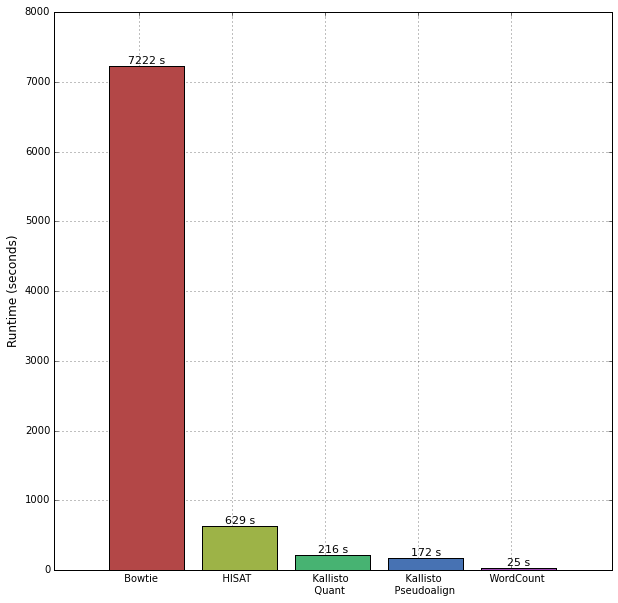

In [26]:
%matplotlib inline

# Generate RBG values to create a rainbow for N bars
N = 5
HSV_tuples = [(x*1.0/N, 0.6, 0.7) for x in range(N)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

menMeans = (bowtie1,hisat,kallisto,TCC,wc)

ind = np.arange(N)
width = 0.45

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width=0.8, color=RGB_tuples,zorder=4, align='center')
methods = [' Bowtie', '   HISAT','   Kallisto\n   Quant',
           '   Kallisto\n    Pseudoalign','    WordCount']
plt.grid()

xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] -0.2 for patch in rects1]
plt.xticks(xticks_pos, methods, ha='center', rotation=0, size=10)

rects = ax.patches
hts=map(lambda x: str(int(x))+' s',menMeans)
for rect, ht in zip(rects, hts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, 
            ht, ha='center', va='bottom',fontsize=11)

plt.ylabel('Runtime (seconds)',size=12)
plt.show()